In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


## `Data Loading`

In [5]:
cust = pd.read_csv('data/Customers.csv')
trans = pd.read_csv('data/Transactions.csv')
prod = pd.read_csv('data/Products.csv')

In [6]:
cust.sample(10)

,CustomerID,CustomerName,Region,SignupDate
190,C0191,Samantha Gibson DVM,South America,2024-04-07
173,C0174,Tracy Steele,South America,2022-11-03
39,C0040,Michael Harrell,Asia,2022-03-07
35,C0036,Brian Aguilar DDS,North America,2024-07-06
82,C0083,Christina Stark,South America,2022-04-07
96,C0097,Tina Ford,Asia,2023-12-18
92,C0093,Nancy Walker,Asia,2024-07-13
17,C0018,Tyler Haynes,North America,2024-09-21
168,C0169,Jennifer Shaw,South America,2023-04-13
63,C0064,Martha Montgomery,Europe,2023-10-22


In [7]:
trans.sample(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
256,T00386,C0116,P051,2024-09-03 03:40:56,4,260.64,65.16
289,T00450,C0104,P068,2024-08-23 02:14:14,1,447.23,447.23
81,T00749,C0133,P023,2024-06-20 19:04:58,2,909.06,454.53
383,T00275,C0018,P027,2024-02-17 18:50:52,4,916.24,229.06
873,T00643,C0137,P075,2024-05-21 09:00:57,3,1493.28,497.76
729,T00845,C0154,P083,2023-12-31 15:44:04,2,911.44,455.72
602,T00104,C0174,P063,2024-01-12 03:22:30,3,100.77,33.59
916,T00575,C0196,P079,2024-12-15 03:43:35,4,1669.48,417.37
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
97,T00644,C0008,P095,2024-06-13 09:13:19,1,227.26,227.26


In [8]:
prod.sample(10)

,ProductID,ProductName,Category,Price
1,P002,ActiveWear Smartwatch,Electronics,346.30
3,P004,BookWorld Rug,Home Decor,95.69
85,P086,SoundWave Novel,Books,440.70
42,P043,SoundWave Novel,Books,404.40
89,P090,ComfortLiving Biography,Books,165.30
63,P064,HomeSense Running Shoes,Clothing,452.42
56,P057,ActiveWear Smartphone,Electronics,239.70
76,P077,ActiveWear Smartwatch,Electronics,265.51
31,P032,BookWorld Cookbook,Books,488.63
59,P060,HomeSense T-Shirt,Clothing,155.65


### `Clubing all the Data together`

In [9]:
total_data = {'Customers': cust, 'Transactions': trans, 'Products': prod}

In [18]:
for key, value in total_data.items():
    print(f'{key} has shape {value.shape}\n')
    print(f'{key} has Data Type\n {value.dtypes}\n')
    print(f'{key} has null values:\n {value.isnull().sum()}\n')
    print(f'{key} has duplicates: {value.duplicated().sum()}\n')
    print(f'{key} has unique values:\n {value.nunique()}\n')
    print(f'{key} has info:\n {value.info()}\n')

Customers has shape (200, 4)

Customers has Data Type
 CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Customers has null values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Customers has duplicates: 0

Customers has unique values:
 CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers has info:
 None

Transactions has shape (1000, 7)

Transactions has Data Type
 TransactionID       object
CustomerID          object
ProductID           object
Trans

### So there aren't any null values in any of the data.
### Also there is not any duplicate values .
####    `customer shape (200 , 4)`
####    `transaction shape (1000 , 7)`
####    `products shape (100 , 4)`


In [22]:
trans["CustomerID"].value_counts()

CustomerID
C0109    11
C0156    11
C0008    10
C0141    10
C0175    10
         ..
C0033     1
C0058     1
C0151     1
C0078     1
C0110     1
Name: count, Length: 199, dtype: int64

### `Region wise distribution of Customers`

C:\Users\Satyam\AppData\Local\Temp\ipykernel_19568\647065203.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=cust, palette='viridis')


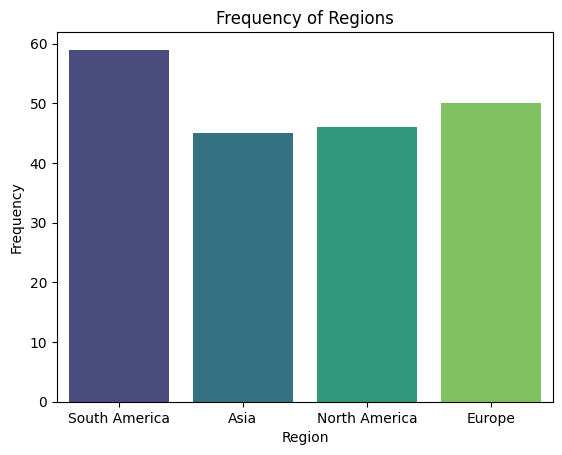

In [24]:

sns.countplot(x='Region', data=cust, palette='viridis')
plt.title("Frequency of Regions")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.show()

### `Product wise distribution Frequency`

C:\Users\Satyam\AppData\Local\Temp\ipykernel_19568\2474883542.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=prod, palette='viridis')


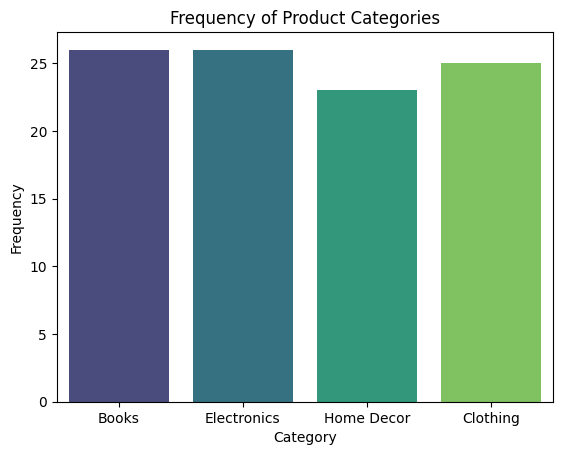

In [26]:

sns.countplot(x='Category', data=prod, palette='viridis')
plt.title("Frequency of Product Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

In [27]:
merged = trans.merge(cust, on='CustomerID').merge(prod, on='ProductID')

### `Total Revenue By Region`

C:\Users\Satyam\AppData\Local\Temp\ipykernel_19568\740920659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_sales, palette='coolwarm')


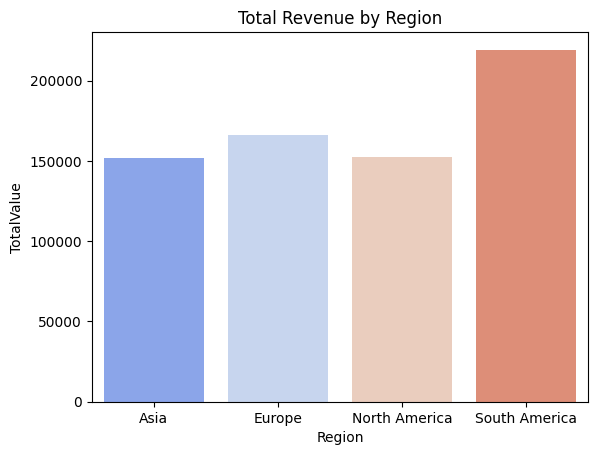

In [28]:
region_sales = merged.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(x='Region', y='TotalValue', data=region_sales, palette='coolwarm')
plt.title("Total Revenue by Region")
plt.show()

In [29]:
aov = merged.groupby('CustomerID')['TotalValue'].mean().reset_index()

### `Average Order Per Value`
### showing Normal Distribution

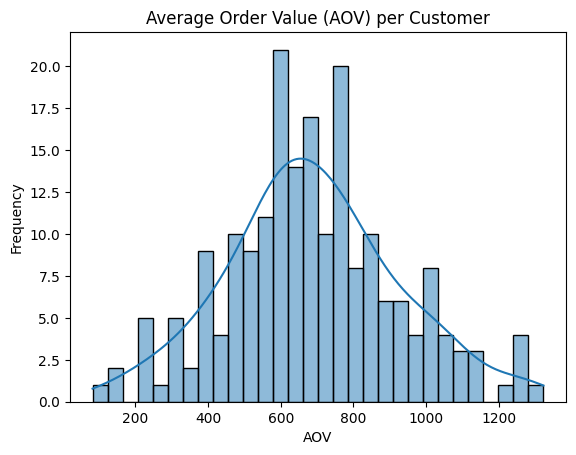

In [30]:

sns.histplot(aov['TotalValue'], kde=True, bins=30)
plt.title("Average Order Value (AOV) per Customer")
plt.xlabel("AOV")
plt.ylabel("Frequency")
plt.show()

In [31]:

merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['Month'] = merged['TransactionDate'].dt.to_period('M')

In [33]:
merged['Month'] = merged['Month'].astype(str)

In [39]:
merged[merged['Month']=='2024-08']['TotalValue'].sum()

np.float64(63436.74)

### `Calculating Month Wise Total Revenue`

In [65]:
# Extract "Month" column as a DataFrame
new_Data = merged[["Month"]].copy() 

# Calculate total sales for each month
monthly_totals = merged.groupby("Month")["TotalValue"].transform("sum")

# Add the Total_Sales column to new_Data
new_Data["Total_Sales"] = monthly_totals

new_Data = new_Data.sort_values("Month").reset_index(drop=True)

print(new_Data)


       Month  Total_Sales
0    2023-12      3769.52
1    2023-12      3769.52
2    2023-12      3769.52
3    2023-12      3769.52
4    2024-01     66376.39
..       ...          ...
995  2024-12     59049.20
996  2024-12     59049.20
997  2024-12     59049.20
998  2024-12     59049.20
999  2024-12     59049.20

[1000 rows x 2 columns]


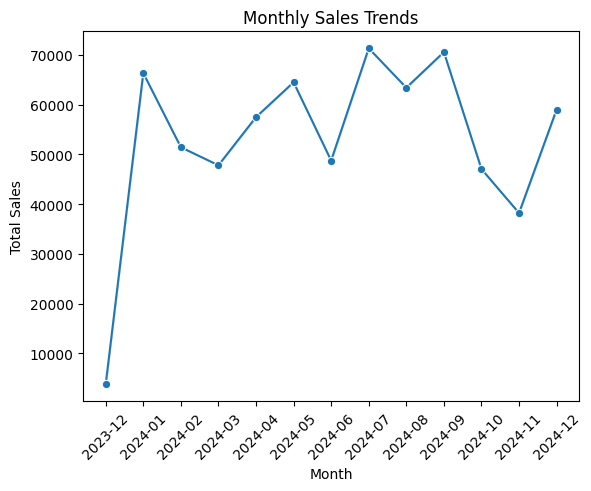

In [66]:
sns.lineplot(x='Month', y='Total_Sales', data=new_Data, marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### `Total Revenue through the transactions`

In [67]:

total_revenue = merged['TotalValue'].sum()
print("Total Revenue: ", total_revenue)

Total Revenue:  689995.56


### `Identification of Top 10 Products through Sales`

In [68]:

top_products = merged.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Profitable Products:\n", top_products)

Top 10 Most Profitable Products:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


### `Region wise Revenue`

In [69]:
region_revenue = merged.groupby('Region')['TotalValue'].sum()
print("Revenue by Region:\n", region_revenue)

Revenue by Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


### `Customer Retention Calculation`

In [73]:
repeat_customers = merged['CustomerID'].value_counts()

repeat_customers = repeat_customers[repeat_customers > 1].count()
total_customers = cust['CustomerID'].nunique()

print(f"Repeat Customers: {repeat_customers}/{total_customers} ({(repeat_customers/total_customers)*100:.2f}%)")


Repeat Customers: 187/200 (93.50%)
